In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plotlyhistograms(data, variables):
    '''
    Plot histograms using plotly
    Args:
        Data: data frame
        variables: name of variables to plot 
    '''
  
    fig = make_subplots(rows=1, cols=len(variables))
    for i, col in enumerate(variables):
        fig.add_trace(go.Histogram(x=data[col], name=col), row=1, col=i+1 )

    fig.show()
def plotlyboxplot(data, y):
    '''
    Plot boxplots using plotly
    args:
      data: data frame
      y: name of variables to plot 
    '''
  
    fig = make_subplots(rows=1, cols=len(y))

    for i, col in enumerate(y):
        fig.add_trace(go.Box(y=data[col], name=col), row=1, col=i+1 )

    fig.show()

Vamos a realizar la exploración de los datos

In [3]:
df = pd.read_csv('Cruceros.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

Como podemos observar la data de la variable crew es "normal". 

In [7]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [11]:
cont = ['Age', 'Tonnage', 'passengers', 'length', 'passenger_density', 'crew']

In [12]:
plotlyhistograms(df, cont)

No hay skewness, entonces no normalizaremos las variables.

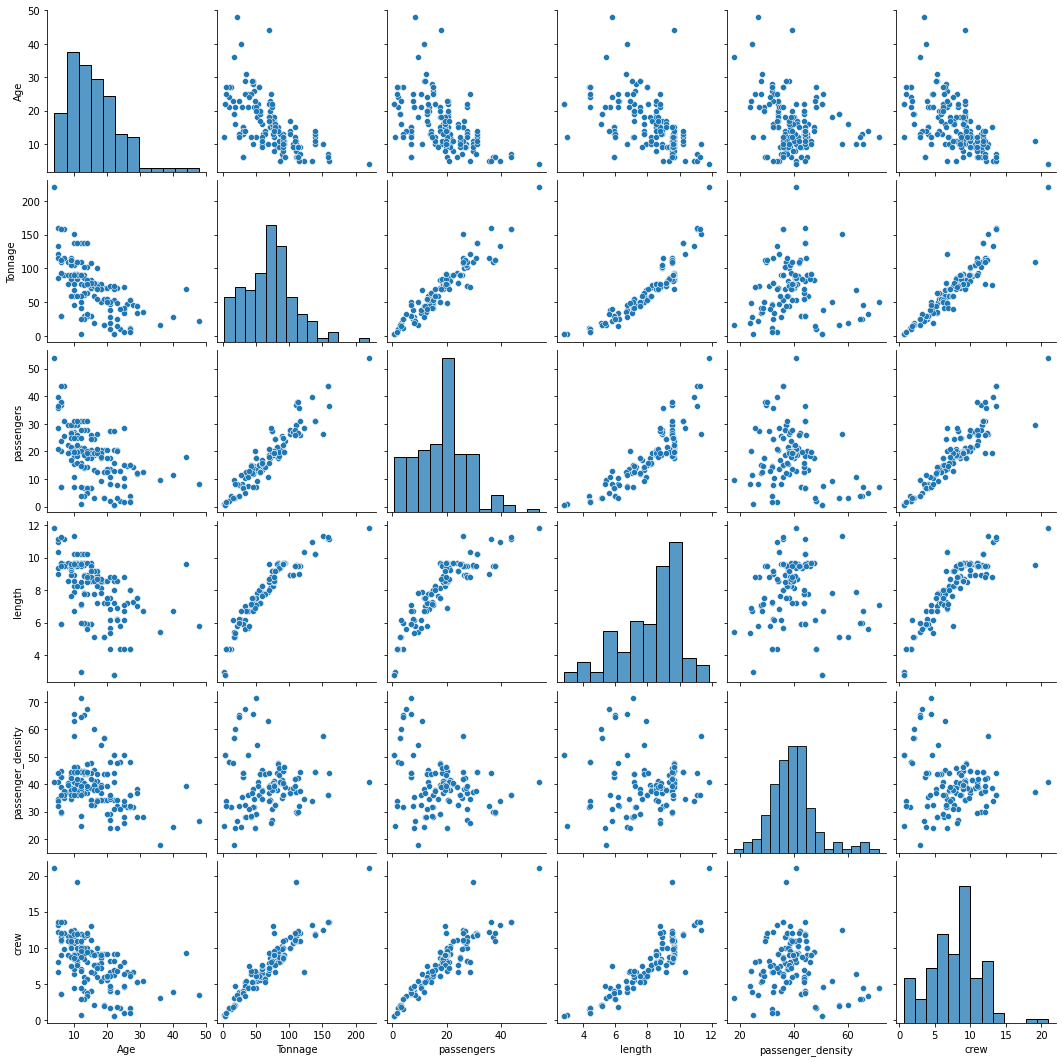

In [13]:
sns.pairplot(data=df, vars= cont)

<AxesSubplot:>

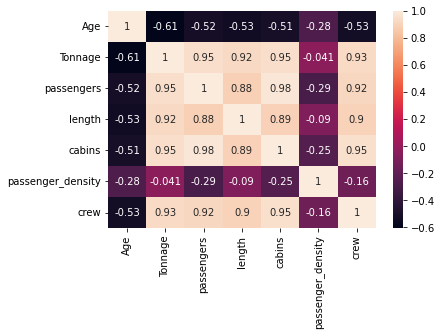

In [14]:
corr = df.corr()
plt.figure()
sns.heatmap(corr, annot=True)

Como podemos observar en la grafica de correlación, las variables que se tomaran en cuenta son todas excepto "passenger_density" y "Age"

In [16]:
plotlyboxplot(df, y=cont)

Hay algunos datos outlayers pero no lo suficiente para eliminarlos o tener en cuenta ya que no estan lejos del upper y lower fence.

In [18]:
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

No hay datos nulos

In [20]:
plotlyhistograms(data=df, variables=['Ship_name', 'Cruise_line'])

No tomaremos en cuenta la variable 'Ship_name' debido a que no son importantes(son solo un nombre de cada barco)

In [27]:
df1 = pd.get_dummies(df, columns=['Cruise_line'])

In [29]:
df1.drop(['passenger_density', 'Age', 'Ship_name', 'crew'], axis=1, inplace=True)

'passenger_density', 'Age' y 'Ship_name' no se tomaran en cuenta para el modelo por las razones antes explicadas.

In [34]:
X = df1
y = df['crew']

In [36]:
#Split de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

In [47]:
from sklearn.linear_model import ElasticNet
linear_model = ElasticNet()
linear_model.fit(X_train, y_train)


In [49]:
linear_model.score(X_test, y_test)

0.8844863444698192

In [50]:
linear_model.score(X_train, y_train)

0.9045584286555552

Como podemos observar se tiene buenos valores para pearson, pero vamos a observar si se puede mejorar

In [51]:
linear_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Los hiperparametros a tener en cuenta son los alpha y los l1_ratio, para cambiarlos y obtener los valores optiomos utilizaremos una curva de validación para cada hiperparametro junto con cross validation donde observaremos y seleccionaremos el degree que tenga mejor r2 

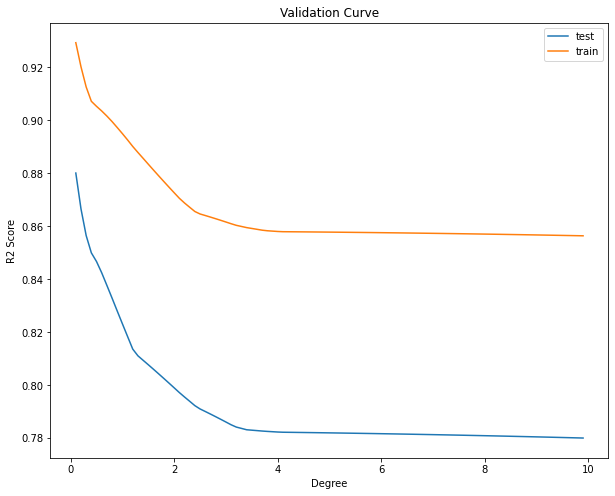

In [54]:
from sklearn.model_selection import validation_curve
degree = np.arange(0.1, 10, 0.1)
score_train, score_test = validation_curve(linear_model, X, y, param_name='alpha', param_range=degree, cv=5, scoring='r2')
plt.figure(figsize=(10,8))
plt.plot(degree, score_test.mean(axis=1), label='test')
plt.plot(degree, score_train.mean(axis=1), label='train')
plt.title('Validation Curve')
plt.xlabel('aplha Degree')
plt.ylabel('R2 Score')
plt.legend()

In [56]:
indx = score_test.mean(axis=1).argmax()
best_degree = degree[indx]
alpha1 = best_degree

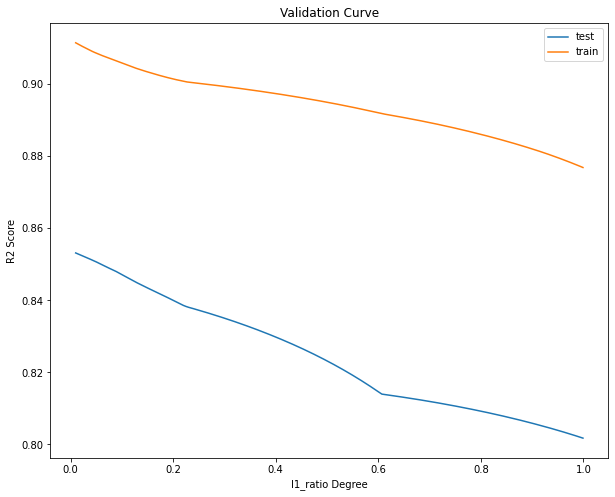

In [71]:
from sklearn.model_selection import validation_curve
degree = np.arange(0.01, 1, 0.01)
score_train, score_test = validation_curve(linear_model, X, y, param_name='l1_ratio', param_range=degree, cv=5, scoring='r2')
plt.figure(figsize=(10,8))
plt.plot(degree, score_test.mean(axis=1), label='test')
plt.plot(degree, score_train.mean(axis=1), label='train')
plt.title('Validation Curve')
plt.xlabel('l1_ratio Degree')
plt.ylabel('R2 Score')
plt.legend()

In [73]:
indx = score_test.mean(axis=1).argmax()
best_degree = degree[indx]
l1_r = best_degree

Vamos a volver a hacer la regresion con esos hiperparametros corregidos.

In [75]:
linear_model = ElasticNet(alpha=alpha1, l1_ratio=l1_r)
linear_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.01)

In [76]:
linear_model.score(X_test, y_test)

0.9108158809286179

Y como podemos observar se mejora la precisión del modelo

La regularizacion nos ayuda para reducir la varianza del modelo y corregir el overfitting, el parametro que se uso fue el L1 y L2 debido a que el modelo es Elastic Net que es un punto medio entre el ridge y el lasso.

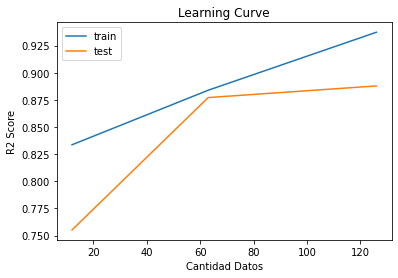

In [78]:
from sklearn.model_selection import learning_curve
N, train_score, test_score = learning_curve(linear_model, X, y, cv=5, train_sizes=[0.1, 0.5, 1.0] ,scoring='r2')
plt.figure()
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, test_score.mean(axis=1), label= 'test')
plt.title('Learning Curve')
plt.xlabel('Cantidad Datos')
plt.ylabel('R2 Score')
plt.legend()

Con el learning curve podemos observar que no hay ni Overfitting ni Underfitting, el modelo se comporta bien de manera general.